# Unsupervised Machine Learning

## Market Segmentation Example

**Introduction** <br>
In the marketing field, applying different strategies to target customers is crucial to maintain or convert customers and eventually increase the company revenue.

**Objective** <br>
This example dataset contains the satisfaction and loyalty of the customers. We will group these customers into several clusters and analyze the characteristic of customers in each cluster. 

**Method**<br>
We are using K-means, and to find the most suitable number of K, we'll standardize the dataset and use the Elbow method.

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project Dataset/Cluster Analysis/3.12. Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


**<Explanation>**<br>

***Satisfaction***: <br>
Type of data: Discrte <br>
Range from 1 to 10. 1 is not satisfied and 10 is very satisfied.<br>
***Brand Loyalty***:<br>
Type of data: continuous <br>
Range from -2.5 to 2.5<br>

## Plot the data

Text(0, 0.5, 'Loyalty')

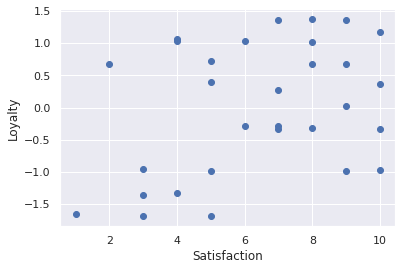

In [ ]:
# Check how the original dataset looks like
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

At the first glance, it looks like there are two clusters.

## Select the features

In [ ]:
clusters = data.copy()

## Clustering <br>

At the first glance, it looks like we have two clusters in our dataset, I'll first try to manually decide the number of K. And if the result seems off, I'll use the Elbow method to test again. 
<br>
(1) Manually choose the number of K<br>
(2) Find the reasonable number of K <br>

### (1) Manually choose the number of K

In [ ]:
# The number of K=2
kmeans = KMeans(2)

# Fit the model with the dataset
kmeans.fit(clusters)

KMeans(n_clusters=2)

In [ ]:
# Store the fix_predict to cluster_pred
cluster_pred = kmeans.fit_predict(clusters)
cluster_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

#### Cluster Result (K=2)

In [ ]:
# Created a column for the cluster predition
clustered = clusters.copy()
clustered['Cluster_pred'] = cluster_pred
clustered.head()

,Satisfaction,Loyalty,Cluster_pred
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0


Text(0, 0.5, 'Loyalty')

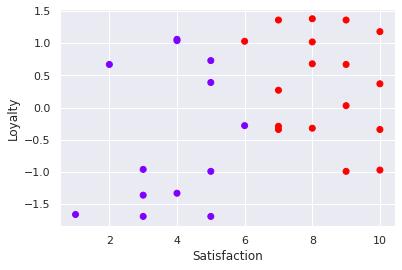

In [ ]:
# Plot the result
plt.scatter(clustered['Satisfaction'], clustered['Loyalty'], c=clustered['Cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Cutoff line is Satisfaction = 6. The result doesn't seem to interpret the interplay between Satisfaction and Loyalty well. <br>
**Problem**: When we cluster on the basis of a single feature, the result looks like this graph with a hard cut-off line and it is fishy.<br>
**Solution**: Standardize the variable and use the Elbow method.<br>

### (2) Find the reasonable number of K

#### Standardize the variable

In [ ]:
from sklearn import preprocessing
clusters_scaled = preprocessing.scale(clusters)
clusters_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

#### Take advantage of the Elbow method

In [ ]:
# Let's test from cluster 1 to 9, what number of clusters fits well.
# Fit the KMeans model with scaled data

wcss=[]

for i in range(1,10):
  kmeans = KMeans(i)              # declear the KMean method
  kmeans.fit(clusters_scaled)     # fit the model with the scaled data
  wcss.append(kmeans.inertia_)    # append the reslut to the wcss list using inertia_

wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.549836791599331,
 5.363006425346784,
 4.5865703112053025,
 3.9203969311075566]

Text(0, 0.5, 'WCSS')

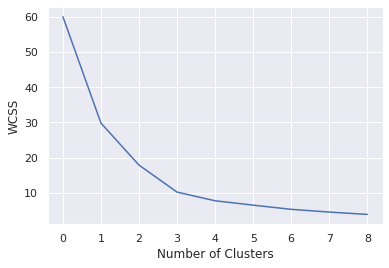

In [ ]:
# plot the result of wcss

plt.plot(wcss)
#plt.plot(range(1,10), wcss) # Can also work
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Either 3 or 4 clusters looks ideal. We can plot K=3 and K=4 to have a clearer picture.

#### Explore clustering solutions and select the number of clusters

In [ ]:
# K=3
kmeans_new = KMeans(3)
# Fit this new model with standardized data
kmeans_new.fit(clusters_scaled)

# Combine the new clustered data to the original points
# Purpose, keep the original Satisfaction and Loyalty values on the graph
# and highlight the clusters using the new kmeans where k=3 and scaled data
cluster_new = clusters.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(clusters_scaled)
cluster_new.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,0


Text(0, 0.5, 'Loyalty')

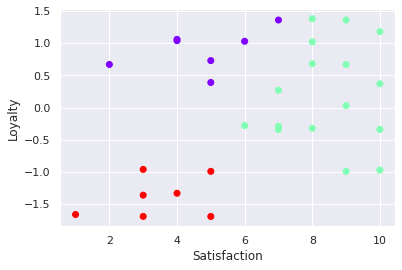

In [ ]:
# Plot the result
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

**Interpretation**:<br>

**Red**: Those customers aren't satisfied with the company and don't seem to come back frequently.<br>
**Purpose**: They aren't satisfied with the company but return to the company.<br>
**Green**: Not clear enough to tell what's going on with those customers. They are all pretty satisfied with the company but some return to the company others not.

In [ ]:
# Do the same for 
# K=4
kmeans_new2 = KMeans(4)
# Fit this new model with standardized data
kmeans_new2.fit(clusters_scaled)

# Combine the new clustered data to the original points
# Purpose, keep the original Satisfaction and Loyalty values on the graph
# and highlight the clusters using the new kmeans where k=3 and scaled data
cluster_new2 = clusters.copy()
cluster_new2['cluster_pred'] = kmeans_new2.fit_predict(clusters_scaled)
cluster_new2.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,0
2,5,-0.99,2
3,7,-0.29,0
4,4,1.06,1


Text(0, 0.5, 'Loyalty')

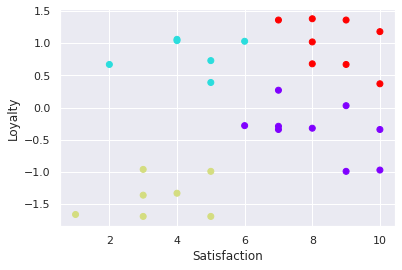

In [ ]:
# Plot the result
plt.scatter(cluster_new2['Satisfaction'], cluster_new2['Loyalty'], c=cluster_new2['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

**Interpretation**: <br>

I believe k=4 is ideal for this project. If a company wants to increase its revenue and has limited resources, which is common in many companies, this is the priority of clusters I will approach and what it can do for customers in each cluster. <br>

**(1) For customers in the *Red* cluster:** Those customers I worry about the least. But I wonder who are those customers? What makes them like our products/service? I will analyze their features and target new customers who share the same traits by using Instagram Ad or Google Ad. <br>

**(2) For customers in the *Purple* cluster:** Since those customers have high satisfaction, I will find out the reason that prevents them from coming back as well as build closer relationships with them so that they will be encouraged to come back. For example, give them some points when they re-order and those points can be applied to their following orders.<br>

**(3) For customers in the *Blue* cluster:** Those are the customers I call supporters and the group I want to secure. They are not happy about us but still coming back, meaning our service or products is probably what they need. But to secure their contribution, I'll find the root causes for their dissatisfaction and move them to the Red cluster.<br>

**(4) For customers in the *Yellow* cluster:** Customers in this cluster are the most difficult to handle as they have low satisfaction and low loyalty. I'll give up this group if I don't have enough resources. However, customers in this cluster can also be new opportunities. Even though they are not satisfied, I'll find the reason behind it and encourage those customers to try our company's product/service again, hoping to increase their satisfaction and in the future coming back to shop more.<br>
